In [1]:
# Data analysis & wrangling
import numpy as np # linear algebra
import pandas as pd # data processing
import random as rnd
import string
import requests
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


from tqdm import tqdm
from collections import Counter



## Amazon products

In [40]:
df5 = pd.read_csv('/Users/Varvara/spiced_working_files/final project/data/activities.csv')
df5


,name,rating,description,adress,web_site,good_1,good_2,good_3,bad_1,bad_2,bad_3
0,Legoland,3.7,Indoor playground,"Potsdamer Str. 4, 10785 Berlin, Germany",legolanddiscoverycentre.com,My son loved it. It is a place to visit with k...,It was pricey but worth the money to spend hal...,You\nCan easily spend the entire day here. It ...,Complete waste of money. The Berlin lego world...,Not worth the money. Lego is leveraging its na...,Complete waste of time and money - a huge disa...
1,Labyrinth Kindermuseum Berlin,4.1,Children's museum,"Osloer Str. 12, 13359 Berlin, Germany",labyrinth-kindermuseum.de,Recommended for kids 4+. The theme is saving n...,"A wonderful place for children to play, touch,...","Well thought out, hands on, play and explorati...",Super small poorly done indoor playground. If ...,Costed 28 Euros( 3 adults and 1 child ) for 1....,"paid 19€ just for 1.5hrs summer program , tota..."
2,MACHmit! Museum for Children,4.1,Children's museum,"Senefelderstraße 5, 10437 Berlin, Germany",machmitmuseum.de,Super cool space with different activities for...,"Very nice place, it is not a museum as one wou...",Fun for the kids! Lots of staff to help out wi...,Don't waste your money and time at the MachMit...,Rip off. Kids and adults pay the same. 2 adult...,Update your opening hours. Your advertising an...
3,Little BIG City Berlin,4.2,Museum,"Panoramastraße 1a, 10178 Berlin, Germany",littlebigcityberlin.de,"even if a dwarf puts on huge boots, it's still...",Loved the experience and highly recommend. Lig...,I am a first grade teacher and I took my class...,One of the most boring attractions I have ever...,Very expensive and not all suitable for young ...,Please DON'T waste your money on this one!!! T...
4,Dockx indoor playground Berlin,3.9,Indoor playground,"Ordensmeisterstraße 1-3, 12099 Berlin, Germany",dockx-berlin.de,Very nice place for small children. You can bu...,Super friendly staff - young man was super hel...,Best place in town for a kid's birthday party!...,The worst playground ever.. too expensive comp...,-Poor Air Circulation\n-Poor Lightings\n-Uncle...,The place is not good at all for small toddler...
...,...,...,...,...,...,...,...,...,...,...,...
111,MOTAWI Bowling,4.0,Bowling alley,"Zerpenschleuser Ring 37, 13439 Berlin, Germany",motawi.de,Probably the biggest bowling alley in the city...,An amazing place to enjoy your day..... Had a ...,Fun bowling place with typical Berliner charm....,We asked them to help us for setting bowling b...,The food service is extremely poor. Took minut...,I asked 5 times for drinks but i got it the 6 ...
112,Haubentaucher Berlin,3.5,Bar,"Revaler Str. 99, 10245 Berlin, Germany",haubentaucher.berlin,Awesome location. Just going in it feels like ...,Really amazing location. A party location with...,"Nice place.....outdoor events, food and drinks...",They didn’t let us in because we were two guys...,The vibe depends a lot on the promoter. Inform...,such a racist and dubious selection never expe...
113,myToys,3.9,Toy store,"Arcaden im UG, Karl-Marx-Straße 66, 12043 Berl...",mytoys.de,I absolutely love this store. The employees a...,Great collection of stuff but a bit heavier on...,Ok,Many boxes are open. But staff does not allow ...,"“cash only! - sorry""",(Translated by Google) I find this toy chain t...
114,folk berlin,5.0,Baby store,"Mittenwalder Str. 47, 10961 Berlin, Germany",folkberlin.com,Sarah went truly above and beyond to make my o...,Ordered online for pick up. Great selection fo...,Have been into the shop and was really impress...,Sarah went truly above and beyond to make my o...,Ordered online for pick up. Great selection fo...,Have been into the shop and was really impress...


In [45]:
df5

,name,rating,description,adress,web_site,good_1,good_2,good_3,bad_1,bad_2,bad_3,good_reviews,bad_reviews
0,Legoland,3.7,Indoor playground,"Potsdamer Str. 4, 10785 Berlin, Germany",legolanddiscoverycentre.com,My son loved it. It is a place to visit with k...,It was pricey but worth the money to spend hal...,You\nCan easily spend the entire day here. It ...,Complete waste of money. The Berlin lego world...,Not worth the money. Lego is leveraging its na...,Complete waste of time and money - a huge disa...,My son loved it. It is a place to visit with k...,Complete waste of money. The Berlin lego world...
1,Labyrinth Kindermuseum Berlin,4.1,Children's museum,"Osloer Str. 12, 13359 Berlin, Germany",labyrinth-kindermuseum.de,Recommended for kids 4+. The theme is saving n...,"A wonderful place for children to play, touch,...","Well thought out, hands on, play and explorati...",Super small poorly done indoor playground. If ...,Costed 28 Euros( 3 adults and 1 child ) for 1....,"paid 19€ just for 1.5hrs summer program , tota...",Recommended for kids 4+. The theme is saving n...,Super small poorly done indoor playground. If ...
2,MACHmit! Museum for Children,4.1,Children's museum,"Senefelderstraße 5, 10437 Berlin, Germany",machmitmuseum.de,Super cool space with different activities for...,"Very nice place, it is not a museum as one wou...",Fun for the kids! Lots of staff to help out wi...,Don't waste your money and time at the MachMit...,Rip off. Kids and adults pay the same. 2 adult...,Update your opening hours. Your advertising an...,Super cool space with different activities for...,Don't waste your money and time at the MachMit...
3,Little BIG City Berlin,4.2,Museum,"Panoramastraße 1a, 10178 Berlin, Germany",littlebigcityberlin.de,"even if a dwarf puts on huge boots, it's still...",Loved the experience and highly recommend. Lig...,I am a first grade teacher and I took my class...,One of the most boring attractions I have ever...,Very expensive and not all suitable for young ...,Please DON'T waste your money on this one!!! T...,"even if a dwarf puts on huge boots, it's still...",One of the most boring attractions I have ever...
4,Dockx indoor playground Berlin,3.9,Indoor playground,"Ordensmeisterstraße 1-3, 12099 Berlin, Germany",dockx-berlin.de,Very nice place for small children. You can bu...,Super friendly staff - young man was super hel...,Best place in town for a kid's birthday party!...,The worst playground ever.. too expensive comp...,-Poor Air Circulation\n-Poor Lightings\n-Uncle...,The place is not good at all for small toddler...,Very nice place for small children. You can bu...,The worst playground ever.. too expensive comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,MOTAWI Bowling,4.0,Bowling alley,"Zerpenschleuser Ring 37, 13439 Berlin, Germany",motawi.de,Probably the biggest bowling alley in the city...,An amazing place to enjoy your day..... Had a ...,Fun bowling place with typical Berliner charm....,We asked them to help us for setting bowling b...,The food service is extremely poor. Took minut...,I asked 5 times for drinks but i got it the 6 ...,Probably the biggest bowling alley in the city...,We asked them to help us for setting bowling b...
112,Haubentaucher Berlin,3.5,Bar,"Revaler Str. 99, 10245 Berlin, Germany",haubentaucher.berlin,Awesome location. Just going in it feels like ...,Really amazing location. A party location with...,"Nice place.....outdoor events, food and drinks...",They didn’t let us in because we were two guys...,The vibe depends a lot on the promoter. Inform...,such a racist and dubious selection never expe...,Awesome location. Just going in it feels like ...,They didn’t let us in because we were two guys...
113,myToys,3.9,Toy store,"Arcaden im UG, Karl-Marx-Straße 66, 12043 Berl...",mytoys.de,I absolutely love this store. The employees a...,Great collection of stuff but a bit heavier on...,Ok,Many boxes are open. But staff does not allow ...,"“cash only! - sorry""",(Translated 

In [46]:
import nltk
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from collections import defaultdict
from pymorphy2 import MorphAnalyzer
from collections import Counter
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import spacy
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


2022-11-30 15:29:31.752100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Good reviews

In [64]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
df5['good_reviews']=df5['good_1']+df5['good_2']+df5['good_3']
df5['good_reviews'][0]

'My son loved it. It is a place to visit with kids and actually I also liked itIt was pricey but worth the money to spend half a day here. Just make sure you pack food and drinks, as there is only one restaurant and they do not have proper food. They only have snacks and those are also pricey.You\nCan easily spend the entire day here. It has many attractions for the little ones including 4d cinema! Small food corner to buy some basics but certainly amazing environment. You should not miss it!'

In [55]:
mystem = Mystem() 
english_stopwords = stopwords.words("english")
#new_stopwords=['toys', 'toys', 'game', 'games']
new_stopwords=['place', 'visit']
english_stopwords.extend(new_stopwords)


def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in english_stopwords\
              and token != " " \
              and token.strip() not in punctuation+'«»“•' \
              and '\n' not in token]
    
    text = " ".join(tokens)
    
    return text

In [62]:
df5['good_reviews'] = df5['good_reviews'].astype(str)
df5['good_reviews'] = df5['good_reviews'].apply(preprocess_text)
df5['good_reviews']

0      son loved kids actually also liked itit pricey...
1      recommended kids 4+ theme saving natural envir...
2      super cool space different activities younger ...
3      even dwarf puts huge boots still dwarf wonder ...
4      nice small children buy drinky coffee ... sepa...
                             ...                        
111    probably biggest bowling alley city total 46 l...
112    awesome location going feels like going holida...
113    absolutely love store employees fantastic pati...
114    sarah went truly beyond make online order birt...
115    nice fun activity top translated google went p...
Name: good_reviews, Length: 116, dtype: object

In [66]:
my_list = Counter(text_trigrams)
my_list

Counter({('son', 'loved', 'kids', 'actually', 'also'): 1,
         ('loved', 'kids', 'actually', 'also', 'liked'): 1,
         ('kids', 'actually', 'also', 'liked', 'itit'): 1,
         ('actually', 'also', 'liked', 'itit', 'pricey'): 1,
         ('also', 'liked', 'itit', 'pricey', 'worth'): 1,
         ('liked', 'itit', 'pricey', 'worth', 'money'): 1,
         ('itit', 'pricey', 'worth', 'money', 'spend'): 1,
         ('pricey', 'worth', 'money', 'spend', 'half'): 1,
         ('worth', 'money', 'spend', 'half', 'day'): 1,
         ('money', 'spend', 'half', 'day', 'make'): 1,
         ('spend', 'half', 'day', 'make', 'sure'): 1,
         ('half', 'day', 'make', 'sure', 'pack'): 1,
         ('day', 'make', 'sure', 'pack', 'food'): 1,
         ('make', 'sure', 'pack', 'food', 'drinks'): 1,
         ('sure', 'pack', 'food', 'drinks', 'one'): 1,
         ('pack', 'food', 'drinks', 'one', 'restaurant'): 1,
         ('food', 'drinks', 'one', 'restaurant', 'proper'): 1,
         ('drinks', '

In [63]:
text = ' '.join(df5['good_reviews'].values)
text_trigrams = [i for i in ngrams(text.split(' '), 5)]
text_trigrams
my_list = Counter(text_trigrams).most_common(50)
my_list[:20]

[(('iconic', 'gate', 'photograph', 'come', 'pictures'), 2),
 (('gate', 'photograph', 'come', 'pictures', 'enjoy'), 2),
 (('photograph', 'come', 'pictures', 'enjoy', 'specular'), 2),
 (('come', 'pictures', 'enjoy', 'specular', 'art'), 2),
 (('pictures', 'enjoy', 'specular', 'art', 'far'), 2),
 (('enjoy', 'specular', 'art', 'far', 'nice'), 2),
 (('specular', 'art', 'far', 'nice', 'walk'), 2),
 (('art', 'far', 'nice', 'walk', 'nearby'), 2),
 (('far', 'nice', 'walk', 'nearby', 'attractions'), 2),
 (('nice', 'walk', 'nearby', 'attractions', 'also'), 2),
 (('walk', 'nearby', 'attractions', 'also', 'people'), 2),
 (('nearby', 'attractions', 'also', 'people', 'blowing'), 2),
 (('attractions', 'also', 'people', 'blowing', 'bubbles'), 2),
 (('also', 'people', 'blowing', 'bubbles', 'air'), 2),
 (('people', 'blowing', 'bubbles', 'air', 'help'), 2),
 (('blowing', 'bubbles', 'air', 'help', 'make'), 2),
 (('bubbles', 'air', 'help', 'make', 'photos'), 2),
 (('air', 'help', 'make', 'photos', 'look'), 2

### Bad reviews

In [44]:
df5['bad_reviews']=df5['bad_1']+df5['bad_2']+df5['bad_3']
df5['bad_reviews'][0]

'Complete waste of money. The Berlin lego world is a little interesting, but that\'s it.\n\nThe entrance is strange. You but tickets online but have to stand in a queue with those that haven\'t got tickets, even though you have to specify a time online what\'s the point??!!\n\nThe cafe doesn\'t open until 11:30! We got here at 10:15... do they not want to make money? Oh that\'s right,  they make it from the horrific ticket prices.\n\nMy son is 9, seems happy.  If you\'re asking me, stay home, play your kids instead, because it\'s essentially that\n\nDon\'t botherNot worth the money. Lego is leveraging its name. Poor and small exhibition, overcrowded with no sanitization of Lego bricks, large carousels again not working, dirty toilets .... the list goes on. Save the money. There are many many more places for kids available in Berlin to spend your money on. Many other and better indoor playgrounds available. Actually, if I would be CEO of Lego, this whole center would be under marketing 

In [99]:
lego_neg=df5['bad_reviews'][0]
lego_pos=df5['good_reviews'][0]

In [ ]:
df5['bad_reviews'] = df5['bad_reviews'].astype(str)
df5['bad_reviews'] = df5['bad_reviews'].apply(preprocess_text)
df5['good_reviews']

In [ ]:
text = ' '.join(df5['good_reviews'].values)
text_trigrams = [i for i in ngrams(text.split(' '), 5)]
text_trigrams
my_list = Counter(text_trigrams).most_common(50)
my_list[:20]

In [78]:
df5.columns

Index(['name', 'rating', 'description', 'adress', 'web_site', 'good_1',
       'good_2', 'good_3', 'bad_1', 'bad_2', 'bad_3', 'good_reviews',
       'bad_reviews'],
      dtype='object')

In [84]:
df5.isnull().sum().sort_values(ascending=False)

bad_reviews     10
bad_3            8
bad_2            7
bad_1            4
good_2           2
good_3           2
good_1           1
name             0
rating           0
description      0
adress           0
web_site         0
good_reviews     0
dtype: int64

### CountVector

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [85]:
# splitting the data
X = df5['good_reviews']
y = df5['name']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [87]:
X_train.shape,y_train.shape

((87,), (87,))

In [88]:
cv = CountVectorizer(stop_words='english', max_df=0.8)# substitute stopwords 
X_cv = cv.fit_transform(X)
X_df = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names_out(), index=y)
X_df.head()

,10,100,10th,10yo,11,11yo,12,1237,13,15,...,zirkus,zone,zoo,zu,zuerkennen,zufrieden,zum,zur,zwar,öffnungszeiten
name,,,,,,,,,,,,,,,,,,,,,
Legoland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth Kindermuseum Berlin,2,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MACHmit! Museum for Children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Little BIG City Berlin,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Dockx indoor playground Berlin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X_cv.shape

(116, 2868)

In [91]:
#cv.get_feature_names()

In [92]:
cv.vocabulary_

{'son': 2341,
 'loved': 1536,
 'kids': 1397,
 'actually': 83,
 'liked': 1492,
 'itit': 1351,
 'pricey': 1961,
 'worth': 2830,
 'money': 1648,
 'spend': 2379,
 'half': 1178,
 'day': 682,
 'make': 1563,
 'sure': 2481,
 'pack': 1796,
 'food': 1008,
 'drinks': 773,
 'restaurant': 2099,
 'proper': 1981,
 'snacks': 2319,
 'easily': 793,
 'entire': 852,
 'attractions': 215,
 'little': 1504,
 'ones': 1753,
 'including': 1301,
 '4d': 37,
 'cinema': 498,
 'small': 2312,
 'corner': 609,
 'buy': 405,
 'basics': 259,
 'certainly': 459,
 'amazing': 135,
 'environment': 856,
 'miss': 1632,
 'recommended': 2053,
 'theme': 2555,
 'saving': 2165,
 'natural': 1689,
 'educate': 802,
 'nature': 1691,
 'using': 2689,
 'toys': 2616,
 'hands': 1182,
 'activities': 78,
 'great': 1144,
 'hours': 1258,
 'plenty': 1908,
 'stations': 2423,
 'build': 390,
 'explore': 916,
 'learn': 1459,
 'paint': 1802,
 'outdoor': 1779,
 'area': 188,
 'tricycle': 2640,
 'kid': 1394,
 'enjoyed': 840,
 'lot': 1530,
 'hard': 1189,
 '

In [93]:
tf = TfidfTransformer()# apply TF-IDF Vectorizer
X_norm = tf.fit_transform(X_cv)# creating sparse matrix 

In [94]:
print(X_norm)

  (0, 2830)	0.08941853927393144
  (0, 2481)	0.1193760763279624
  (0, 2379)	0.22324672158038308
  (0, 2341)	0.12561344273100156
  (0, 2319)	0.14248939539742594
  (0, 2312)	0.09648434489592092
  (0, 2099)	0.1482449821183305
  (0, 1981)	0.18926431662380597
  (0, 1961)	0.3482506014590706
  (0, 1796)	0.16338399801260117
  (0, 1753)	0.15505239634701806
  (0, 1648)	0.14248939539742594
  (0, 1632)	0.16338399801260117
  (0, 1563)	0.1052069177497878
  (0, 1536)	0.09807341055473046
  (0, 1504)	0.10329175912460845
  (0, 1492)	0.16338399801260117
  (0, 1397)	0.07219309194352565
  (0, 1351)	0.18926431662380597
  (0, 1301)	0.1482449821183305
  (0, 1178)	0.1482449821183305
  (0, 1008)	0.30987527737382536
  (0, 856)	0.1482449821183305
  (0, 852)	0.1741253007295353
  (0, 793)	0.12561344273100156
  :	:
  (115, 1220)	0.14070592278209462
  (115, 1176)	0.11979274074118912
  (115, 1170)	0.1529393500467795
  (115, 1135)	0.10438044511250716
  (115, 1134)	0.059000408542231916
  (115, 1131)	0.132026168005874
  (

In [95]:
#transforming X_test
X_norm_trans=tf.transform(X_norm).toarray()
X_norm_trans

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17023538, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [96]:
# converting sparse matrix into a dense matrix to view it effectively
tf_vectors=pd.DataFrame(X_norm.todense().round(2), columns=cv.get_feature_names()) 

In [97]:
tf_vectors.head()

,10,100,10th,10yo,11,11yo,12,1237,13,15,...,zirkus,zone,zoo,zu,zuerkennen,zufrieden,zum,zur,zwar,öffnungszeiten
0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.18,0.0,0.0,0.11,0.11,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.09,0.0,0.0,0.00,0.00,0.0,0.0,0.12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### WordCloud

In [105]:
#text=pd.read_csv("lego_bad_reviews.txt", sep=" ")
text=df5['bad_reviews'][0]

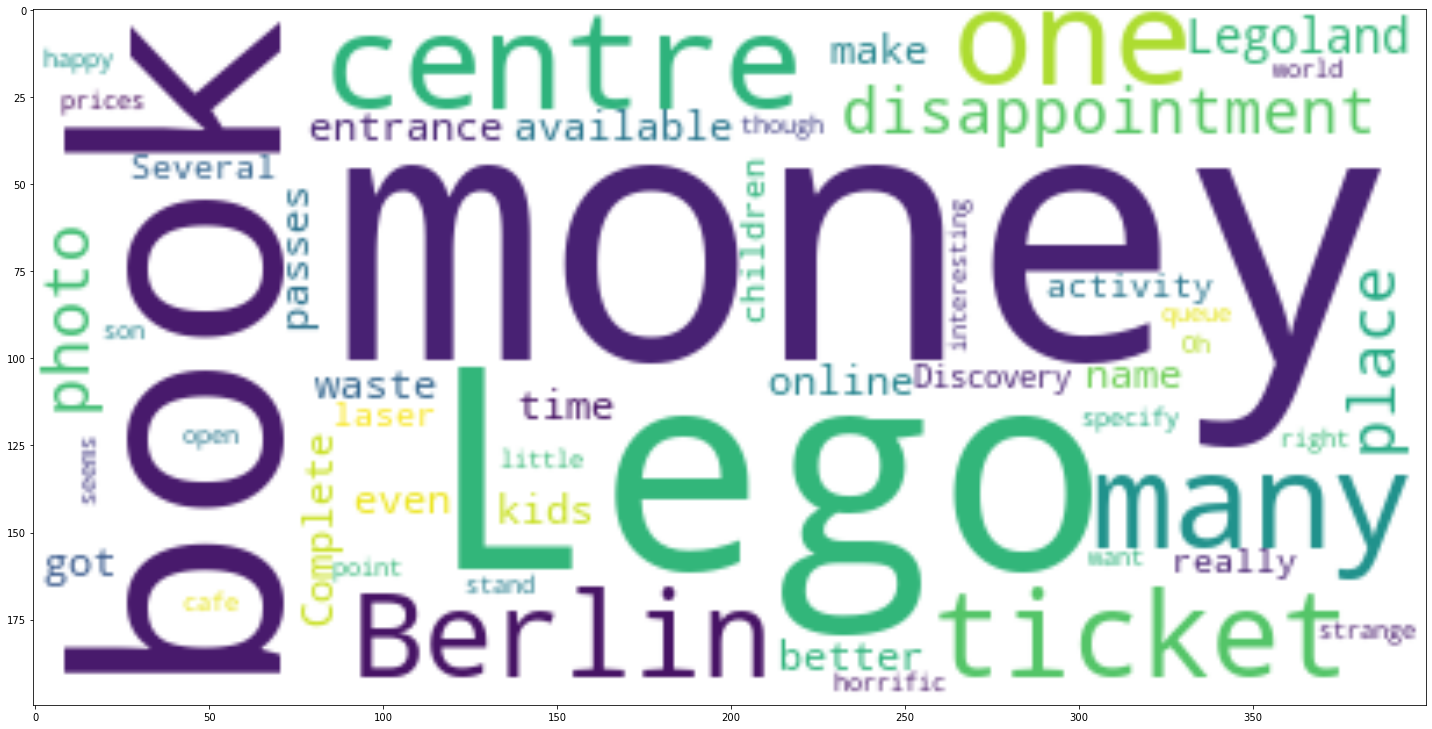

In [106]:
mask = np.zeros((500, 600, 3), np.uint8)
mask[150:350,150:350,:] = 255  # masked out area
cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                #mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(text)
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.tight_layout(pad = 1.08)# important feature(without it there is a empty space in the middle)
plt.savefig('cloud.png')
plt.show()

In [107]:
text1=df5['good_reviews'][0]

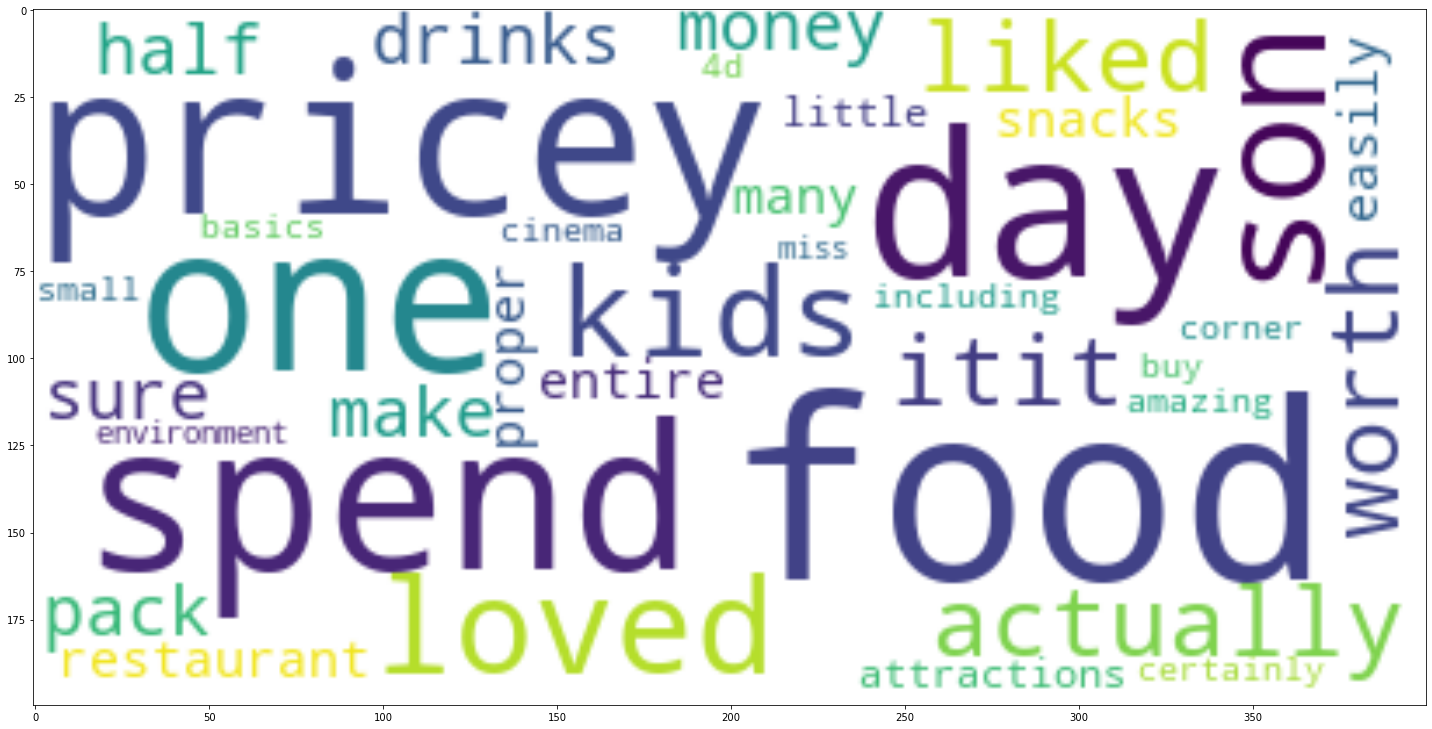

In [109]:
mask = np.zeros((500, 600, 3), np.uint8)
mask[150:350,150:350,:] = 255  # masked out area
cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                #mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(text1)
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.tight_layout(pad = 1.08)# important feature(without it there is a empty space in the middle)
plt.savefig('cloud.png')
plt.show()

### LDA

In [112]:
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

0it [00:00, ?it/s]

In [114]:
df5

,name,rating,description,adress,web_site,good_1,good_2,good_3,bad_1,bad_2,bad_3,good_reviews,bad_reviews
0,Legoland,3.7,Indoor playground,"Potsdamer Str. 4, 10785 Berlin, Germany",legolanddiscoverycentre.com,My son loved it. It is a place to visit with k...,It was pricey but worth the money to spend hal...,You\nCan easily spend the entire day here. It ...,Complete waste of money. The Berlin lego world...,Not worth the money. Lego is leveraging its na...,Complete waste of time and money - a huge disa...,son loved kids actually also liked itit pricey...,Complete waste of money. The Berlin lego world...
1,Labyrinth Kindermuseum Berlin,4.1,Children's museum,"Osloer Str. 12, 13359 Berlin, Germany",labyrinth-kindermuseum.de,Recommended for kids 4+. The theme is saving n...,"A wonderful place for children to play, touch,...","Well thought out, hands on, play and explorati...",Super small poorly done indoor playground. If ...,Costed 28 Euros( 3 adults and 1 child ) for 1....,"paid 19€ just for 1.5hrs summer program , tota...",recommended kids 4+ theme saving natural envir...,Super small poorly done indoor playground. If ...
2,MACHmit! Museum for Children,4.1,Children's museum,"Senefelderstraße 5, 10437 Berlin, Germany",machmitmuseum.de,Super cool space with different activities for...,"Very nice place, it is not a museum as one wou...",Fun for the kids! Lots of staff to help out wi...,Don't waste your money and time at the MachMit...,Rip off. Kids and adults pay the same. 2 adult...,Update your opening hours. Your advertising an...,super cool space different activities younger ...,Don't waste your money and time at the MachMit...
3,Little BIG City Berlin,4.2,Museum,"Panoramastraße 1a, 10178 Berlin, Germany",littlebigcityberlin.de,"even if a dwarf puts on huge boots, it's still...",Loved the experience and highly recommend. Lig...,I am a first grade teacher and I took my class...,One of the most boring attractions I have ever...,Very expensive and not all suitable for young ...,Please DON'T waste your money on this one!!! T...,even dwarf puts huge boots still dwarf wonder ...,One of the most boring attractions I have ever...
4,Dockx indoor playground Berlin,3.9,Indoor playground,"Ordensmeisterstraße 1-3, 12099 Berlin, Germany",dockx-berlin.de,Very nice place for small children. You can bu...,Super friendly staff - young man was super hel...,Best place in town for a kid's birthday party!...,The worst playground ever.. too expensive comp...,-Poor Air Circulation\n-Poor Lightings\n-Uncle...,The place is not good at all for small toddler...,nice small children buy drinky coffee ... sepa...,The worst playground ever.. too expensive comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,MOTAWI Bowling,4.0,Bowling alley,"Zerpenschleuser Ring 37, 13439 Berlin, Germany",motawi.de,Probably the biggest bowling alley in the city...,An amazing place to enjoy your day..... Had a ...,Fun bowling place with typical Berliner charm....,We asked them to help us for setting bowling b...,The food service is extremely poor. Took minut...,I asked 5 times for drinks but i got it the 6 ...,probably biggest bowling alley city total 46 l...,We asked them to help us for setting bowling b...
112,Haubentaucher Berlin,3.5,Bar,"Revaler Str. 99, 10245 Berlin, Germany",haubentaucher.berlin,Awesome location. Just going in it feels like ...,Really amazing location. A party location with...,"Nice place.....outdoor events, food and drinks...",They didn’t let us in because we were two guys...,The vibe depends a lot on the promoter. Inform...,such a racist and dubious selection never expe...,awesome location going feels like going holida...,They didn’t let us in because we were two guys...
113,myToys,3.9,Toy store,"Arcaden im UG, Karl-Marx-Straße 66, 12043 Berl...",mytoys.de,I absolutely love this store. The employees a...,Great collection of stuff but a bit heavier on...,Ok,Many boxes are open. But staff does not allow ...,"“cash only! - sorry""",(Translated by

In [115]:
df5['bad_reviews']=df5['bad_reviews'].astype(str)

In [116]:
df5['lang'] = df5.bad_reviews.progress_map(detect)

  0%|          | 0/116 [00:00<?, ?it/s]

In [118]:
df5.lang.value_counts()

en    97
tl    10
de     7
pt     2
Name: lang, dtype: int64

In [119]:
df5 = df5.loc[df5.lang=='en']

### tokenize

In [120]:
from nltk.tokenize import sent_tokenize

In [121]:
df5['sentences'] = df5.bad_reviews.progress_map(sent_tokenize)
df5['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of bad reviews

  0%|          | 0/97 [00:00<?, ?it/s]

['Complete waste of money.',
 "The Berlin lego world is a little interesting, but that's it.",
 'The entrance is strange.']

In [122]:
from nltk.tokenize import word_tokenize

In [123]:
df5['tokens_sentences'] = df5['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(df5['tokens_sentences'].head(1).tolist()[0][:3])

  0%|          | 0/97 [00:00<?, ?it/s]

[['Complete', 'waste', 'of', 'money', '.'], ['The', 'Berlin', 'lego', 'world', 'is', 'a', 'little', 'interesting', ',', 'but', 'that', "'s", 'it', '.'], ['The', 'entrance', 'is', 'strange', '.']]


### Lemmatizing with POS tagging

In [124]:
from nltk import pos_tag

In [125]:
df5['POS_tokens'] = df5['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(df5['POS_tokens'].head(1).tolist()[0][:3])

  0%|          | 0/97 [00:00<?, ?it/s]

[[('Complete', 'JJ'), ('waste', 'NN'), ('of', 'IN'), ('money', 'NN'), ('.', '.')], [('The', 'DT'), ('Berlin', 'NNP'), ('lego', 'NN'), ('world', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('little', 'JJ'), ('interesting', 'JJ'), (',', ','), ('but', 'CC'), ('that', 'DT'), ("'s", 'VBZ'), ('it', 'PRP'), ('.', '.')], [('The', 'DT'), ('entrance', 'NN'), ('is', 'VBZ'), ('strange', 'JJ'), ('.', '.')]]


In [128]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Varvara/nltk_data...


True

In [129]:
# Lemmatizing each word with its POS tag, in each sentence
df5['tokens_sentences_lemmatized'] = df5['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

  0%|          | 0/97 [00:00<?, ?it/s]

In [130]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [132]:
df5['tokens_sentences_lemmatized'].head(1).tolist()[0][:10]

[['Complete', 'waste', 'of', 'money', '.'],
 ['The',
  'Berlin',
  'lego',
  'world',
  'be',
  'a',
  'little',
  'interesting',
  ',',
  'but',
  'that',
  "'s",
  'it',
  '.'],
 ['The', 'entrance', 'be', 'strange', '.'],
 ['You',
  'but',
  'ticket',
  'online',
  'but',
  'have',
  'to',
  'stand',
  'in',
  'a',
  'queue',
  'with',
  'those',
  'that',
  'have',
  "n't",
  'get',
  'ticket',
  ',',
  'even',
  'though',
  'you',
  'have',
  'to',
  'specify',
  'a',
  'time',
  'online',
  'what',
  "'s",
  'the',
  'point',
  '?',
  '?',
  '!',
  '!'],
 ['The', 'cafe', 'do', "n't", 'open', 'until', '11:30', '!'],
 ['We',
  'get',
  'here',
  'at',
  '10:15',
  '...',
  'do',
  'they',
  'not',
  'want',
  'to',
  'make',
  'money',
  '?'],
 ['Oh',
  'that',
  "'s",
  'right',
  ',',
  'they',
  'make',
  'it',
  'from',
  'the',
  'horrific',
  'ticket',
  'price',
  '.'],
 ['My', 'son', 'be', '9', ',', 'seem', 'happy', '.'],
 ['If',
  'you',
  "'re",
  'ask',
  'me',
  ',',
  '

### Regrouping tokens and removing stop words

In [133]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [134]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [135]:
df5['tokens'] = df5['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df5['tokens'] = df5['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [136]:
df5['tokens'].head(1).tolist()[0][:30]

['complete',
 'waste',
 'money',
 'berlin',
 'lego',
 'world',
 'little',
 'interesting',
 'entrance',
 'strange',
 'ticket',
 'online',
 'stand',
 'queue',
 'ticket',
 'even',
 'though',
 'specify',
 'time',
 'online',
 'point',
 'cafe',
 'open',
 'money',
 'oh',
 'right',
 'horrific',
 'ticket',
 'price',
 'son']

In [137]:
from gensim.models import Phrases

In [138]:
tokens = df5['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [139]:
from gensim import corpora

In [140]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [141]:
from gensim import models
import numpy as np

In [142]:
np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 534 ms, sys: 9.7 ms, total: 544 ms
Wall time: 558 ms


In [143]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.033*"animal" + 0.024*"could" + 0.022*"usher" + 0.022*"walk" + 0.020*"place" + 0.017*"ask" + 0.017*"kid" + 0.016*"day" + 0.016*"seat" + 0.015*"eat" + 0.014*"show" + 0.014*"museum" + 0.013*"disappointed" + 0.012*"little" + 0.012*"waste_time_money" + 0.012*"free" + 0.012*"rude" + 0.012*"three" + 0.011*"beautiful" + 0.011*"saw"

1: 0.025*"people" + 0.018*"nicht" + 0.015*"und" + 0.014*"bring" + 0.013*"dort" + 0.013*"leave" + 0.011*"mir" + 0.011*"eine" + 0.010*"translated_google" + 0.010*"light" + 0.010*"thing" + 0.009*"original" + 0.009*"friend" + 0.009*"ich" + 0.009*"big" + 0.009*"nothing" + 0.009*"wurde" + 0.009*"course" + 0.009*"shop" + 0.009*"place"

2: 0.028*"climb" + 0.020*"translated_google" + 0.020*"nicht" + 0.018*"original" + 0.018*"da" + 0.016*"und" + 0.014*"dann" + 0.014*"ist" + 0.013*"service" + 0.013*"der" + 0.012*"das" + 0.011*"hall" + 0.011*"aber" + 0.011*"mir" + 0.010*"equipment" + 0.009*"customer" + 0.009*"personal" + 0.009*"ich" + 0.009*"spend" + 0.008*"machen"

3: 0.

In [144]:
print(df5.bad_reviews.loc[0][:500])

Complete waste of money. The Berlin lego world is a little interesting, but that's it.

The entrance is strange. You but tickets online but have to stand in a queue with those that haven't got tickets, even though you have to specify a time online what's the point??!!

The cafe doesn't open until 11:30! We got here at 10:15... do they not want to make money? Oh that's right,  they make it from the horrific ticket prices.

My son is 9, seems happy.  If you're asking me, stay home, play your kids 


In [145]:
lda_model[corpus[0]]

[(3, 0.24015),
 (7, 0.3733357),
 (10, 0.06320267),
 (11, 0.044048127),
 (14, 0.27785096)]

In [ ]:
### Checking on good reviews

In [146]:
df5['good_reviews']=df5['good_reviews'].astype(str)

In [151]:
df5['good_reviews'][0]

'son loved kids actually also liked itit pricey worth money spend half day make sure pack food drinks one restaurant proper food snacks also pricey easily spend entire day many attractions little ones including 4d cinema small food corner buy basics certainly amazing environment miss'

In [152]:
test='''son loved kids actually also liked itit pricey worth money spend half day make sure pack food drinks one restaurant proper food snacks also pricey easily spend entire day many attractions little ones including 4d cinema small food corner buy basics certainly amazing environment miss'''

In [153]:
tokens = word_tokenize(test)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,2,0.07,"0.028*""climb"" + 0.020*""translated_google"" + 0...."
1,3,0.43,"0.023*""close"" + 0.021*""museum"" + 0.016*""time"" ..."
2,7,0.30,"0.023*""time"" + 0.019*""money"" + 0.015*""baby"" + ..."
3,14,0.08,"0.020*""child"" + 0.019*""bag"" + 0.018*""us"" + 0.0..."
4,15,0.11,"0.017*""allow"" + 0.015*""visit"" + 0.012*""time"" +..."


In [155]:
topics = [lda_model[corpus[i]] for i in range(len(df5))]

In [156]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038537,NaN,NaN,NaN,NaN,NaN,0.091301,NaN,NaN,0.869287,NaN


In [157]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [158]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.240140,0.0,0.000000,0.00000,0.373331,0.0,0.0,0.063206,0.044051,0.0,0.000000,0.277859,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.995602,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.325204,0.0,0.000000,0.67128,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.997086,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.143846,0.0,0.0,0.000000,0.000000,0.0,0.851785,0.000000,0.0,0.0,0.0,0.0,0.0


In [159]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

3     0.997086
8     0.996428
93    0.995974
9     0.995796
37    0.991441
0     0.277859
69    0.133322
46    0.099545
62    0.000000
70    0.000000
68    0.000000
67    0.000000
66    0.000000
65    0.000000
64    0.000000
63    0.000000
59    0.000000
61    0.000000
60    0.000000
72    0.000000
Name: 14, dtype: float64

<AxesSubplot:>

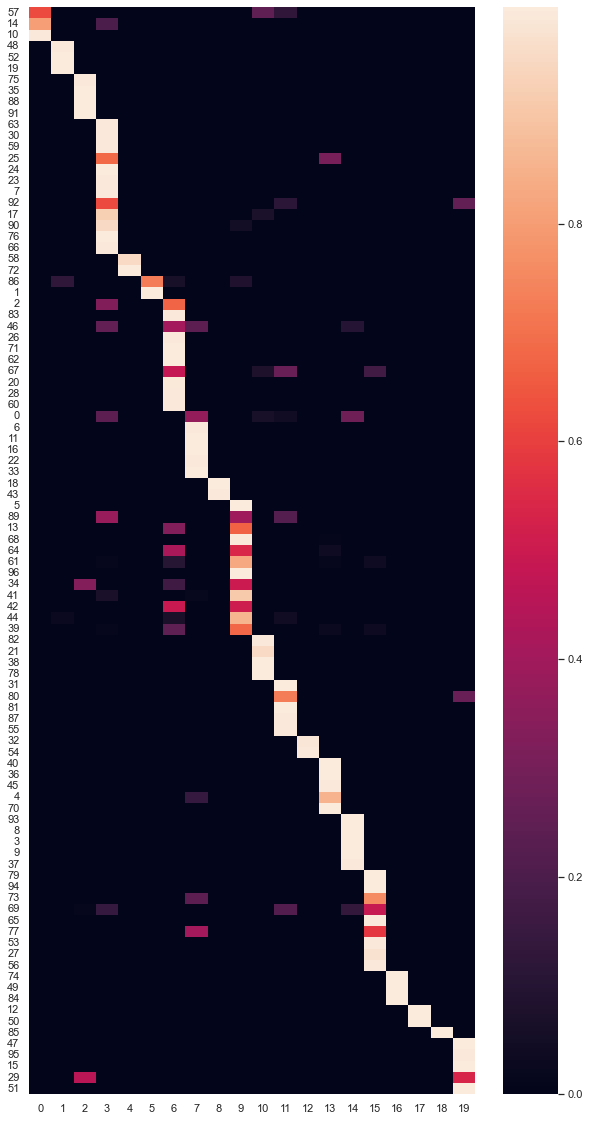

In [162]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index]);

<AxesSubplot:>

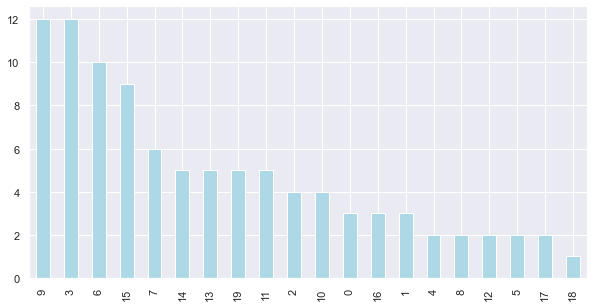

In [161]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [167]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim


vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

AttributeError: module 'pyLDAvis' has no attribute 'gensimvis'

In [166]:
!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
